# MODEL 5 LSS 3 # 1
### Contains all fixed-before-conditional trials, regardless of interfering BL
### Combines A & C trials into single regressor
### Accounts for last three noisy volumes via stats (regressor of non-interest -- EV)

#  WMAZE Beta Series Correlation Analysis

## Obtains correlation values for the regions of interest:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Medial PFC (FS labels: rostral anterior cingulate [1026, 2026] & caudal anterior cingulate [1002, 2002])
### Dorsolateral PFC (Lausanne atlas: dlPFC)

### Use Glob to grab all previously created anatomy masks and beta series cope files

In [1]:
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    # Grab the mask files for each subject
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/mask/anat_masks/_subject_id_' + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(sorted(mask_filenames_glob))
    # Grab the cope files for each subject
    subjcopes_glob = glob(proj_dir + '/frstlvl/wmaze_MRthesis/fixed_before_conditional/model5_2-3-1/merge_copes/'
                          + SID + '/merged/cope_*')
    cope_files.append(sorted(subjcopes_glob))
    # If there are no cope files, print subject id
    if len(cope_files[-1]) == 0:
        print(SID)

### Cell to double-check the array indexing for both the masks and the copes

In [ ]:
print '0. left dlPFC'
print(mask_filenames[0][0]) #lh-dlPFC Lausanne
print""
print '1. left hippocampus'
print(mask_filenames[0][1]) #lh-hippocampus
print""
print '2. left mPFC (rac-only)'
print(mask_filenames[0][2]) #lh-mPFC_rac-only
print""
print '3. left mPFC (orig)'
print(mask_filenames[0][3]) #lh-mPFC (orig)
print""
print '4. left putamen'
print(mask_filenames[0][4]) #lh-putamen
print""
print '5. left caudate'
print(mask_filenames[0][5]) #lh-caudate
print""
print '6. right dlPFC'
print(mask_filenames[0][6]) #rh-dlPFC Lausanne
print""
print '7. right hippocampus'
print(mask_filenames[0][7]) #rh-hippocampus
print""
print '8. right mPFC (orig)'
print(mask_filenames[0][8]) #rh-mPFC (orig)
print""
print '9. right putamen'
print(mask_filenames[0][9]) #rh-putamen
print""
print '10. right caudate'
print(mask_filenames[0][10]) #rh-caudate
print""
print '11. right mPFC (rac-only)'
print(mask_filenames[0][11]) #rh-mPFC_rac_only
print""
print '12. left mPFC (rac-cac)'
print(mask_filenames[0][12]) #lh-mPFC_rac-cac
print""
print '13. right mPFC (rac-cac)'
print(mask_filenames[0][13]) #rh-mPFC_rac-cac
print""

print '-----'

print 'cope_corr'
print(cope_files[0][0]) #cope_corr
print ""
print 'cope_incorr'
print(cope_files[0][1]) #cope_incorr

#for i in cope_files:
#    print(len(i))


### Use binarized mask to obtain activation in left & right hemisphere for each ROI

In [2]:
import nibabel as nb
import pandas as pd
import numpy as np
from scipy import stats


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lh_hp_corr':[], 'rh_hp_corr':[], 
            'lh_hp_incorr':[], 'rh_hp_incorr':[],                 
            'lh_caudate_corr':[], 'rh_caudate_corr':[], 
            'lh_caudate_incorr':[], 'rh_caudate_incorr':[],  
            'lh_dlPFC_corr':[], 'rh_dlPFC_corr':[], 
            'lh_dlPFC_incorr':[], 'rh_dlPFC_incorr':[],            
            'lh_mPFC_corr':[], 'rh_mPFC_corr':[], 
            'lh_mPFC_incorr':[], 'rh_mPFC_incorr':[]}

corr_matrix = np.zeros((len(sids), 5))

# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][1])
    rh_hp_img = nb.load(mask_filenames[i][7])
    
    lh_caudate_img = nb.load(mask_filenames[i][5])
    rh_caudate_img = nb.load(mask_filenames[i][10])
    
    lh_dlPFC_img = nb.load(mask_filenames[i][0])
    rh_dlPFC_img = nb.load(mask_filenames[i][6])
    
    lh_mPFC_img = nb.load(mask_filenames[i][12])
    rh_mPFC_img = nb.load(mask_filenames[i][13])
    
    #Load copes for corr vs incorr betas
    cope_corr_img = nb.load(cope_files[i][0])
    cope_incorr_img = nb.load(cope_files[i][1])
     
  
    ########################
    ### Left Hippocampus ###
    ########################
    
    # cope_corr
    lh_hp_corr_data = cope_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_corr'].append(lh_hp_corr_data[0:-1])
    
    # cope_incorr
    lh_hp_incorr_data = cope_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_incorr'].append(lh_hp_incorr_data[0:-1])
    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # cope_corr
    rh_hp_corr_data = cope_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_corr'].append(rh_hp_corr_data[0:-1])

    # cope_incorr
    rh_hp_incorr_data = cope_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_incorr'].append(rh_hp_incorr_data[0:-1])
    
    #####################
    ### Left Caudate ###
    ##################### 
    
    # cope_corr
    lh_caudate_corr_data = cope_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_corr'].append(lh_caudate_corr_data[0:-1])

    # cope_incorr
    lh_caudate_incorr_data = cope_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_incorr'].append(lh_caudate_incorr_data[0:-1])
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # cope_corr
    rh_caudate_corr_data = cope_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_corr'].append(rh_caudate_corr_data[0:-1])

    # cope_incorr
    rh_caudate_incorr_data = cope_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_incorr'].append(rh_caudate_incorr_data[0:-1])  
    
    ####################
    #### Left mPFC #####
    ####################
    
    # cope_corr
    lh_mPFC_corr_data = cope_corr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_corr'].append(lh_mPFC_corr_data[0:-1])
    
    # cope_incorr
    lh_mPFC_incorr_data = cope_incorr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_incorr'].append(lh_mPFC_incorr_data[0:-1])    
    
    #####################
    #### Right mPFC #####
    #####################
    
    # cope_corr
    rh_mPFC_corr_data = cope_corr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_corr'].append(rh_mPFC_corr_data[0:-1])

    # cope_incorr
    rh_mPFC_incorr_data = cope_incorr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_incorr'].append(rh_mPFC_incorr_data[0:-1]) 
    
    ####################
    #### Left dlPFC ####
    ####################
    
    # cope_corr
    lh_dlPFC_corr_data = cope_corr_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_corr'].append(lh_dlPFC_corr_data[0:-1])
    
    # cope_incorr
    lh_dlPFC_incorr_data = cope_incorr_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_incorr'].append(lh_dlPFC_incorr_data[0:-1])  
    
    #####################
    ### Right dlPFC ###
    #####################
    
    # cope_corr
    rh_dlPFC_corr_data = cope_corr_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_corr'].append(rh_dlPFC_corr_data[0:-1])

    # cope_incorr
    rh_dlPFC_incorr_data = cope_incorr_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_incorr'].append(rh_dlPFC_incorr_data[0:-1])
    
    
    all_keys = ['lh_hp_corr', 'rh_hp_corr', 
                'lh_hp_incorr', 'rh_hp_incorr',                 
                'lh_caudate_corr', 'rh_caudate_corr', 
                'lh_caudate_incorr', 'rh_caudate_incorr',  
                'lh_dlPFC_corr', 'rh_dlPFC_corr', 
                'lh_dlPFC_incorr', 'rh_dlPFC_incorr',            
                'lh_mPFC_corr', 'rh_mPFC_corr', 
                'lh_mPFC_incorr', 'rh_mPFC_incorr']
    
    for key in all_keys: 
        # averaging each column for only the current participant 
        all_data[key][-1] = np.mean(all_data[key][-1], axis = 0)
       
    #Combined Hippocampus average for corr and incorr for current sub
    all_data['hp_corr'] = (np.array(all_data['lh_hp_corr'][-1]) + np.array(all_data['rh_hp_corr'][-1]))/2.
    all_data['hp_incorr'] = (np.array(all_data['lh_hp_incorr'][-1]) + np.array(all_data['rh_hp_incorr'][-1]))/2.
                             
    #Combined Caudate average for corr and incorr for current sub
    all_data['caudate_corr'] = (np.array(all_data['lh_caudate_corr'][-1]) + np.array(all_data['rh_caudate_corr'][-1]))/2.
    all_data['caudate_incorr'] = (np.array(all_data['lh_caudate_incorr'][-1]) + np.array(all_data['rh_caudate_incorr'][-1]))/2.

    # Combined mPFC average for corr and incorr for current sub
    all_data['mPFC_corr'] = (np.array(all_data['lh_mPFC_corr'][-1]) + np.array(all_data['rh_mPFC_corr'][-1]))/2.
    all_data['mPFC_incorr'] = (np.array(all_data['lh_mPFC_incorr'][-1]) + np.array(all_data['rh_mPFC_incorr'][-1]))/2.

    #Combined dlPFC average for corr and incorr for current sub
    all_data['dlPFC_corr'] = (np.array(all_data['lh_dlPFC_corr'][-1]) + np.array(all_data['rh_dlPFC_corr'][-1]))/2.
    all_data['dlPFC_incorr'] = (np.array(all_data['lh_dlPFC_incorr'][-1]) + np.array(all_data['rh_dlPFC_incorr'][-1]))/2.   
   
    
    # Creation of the correlation matrix (with subject id column)
    corr_matrix[i][0] = float(sids[i][-3:])
    corr_matrix[i][1] = stats.pearsonr(all_data['hp_corr'], all_data['mPFC_corr'])[0]
    corr_matrix[i][2] = stats.pearsonr(all_data['hp_incorr'], all_data['mPFC_incorr'])[0]
    corr_matrix[i][3] = stats.pearsonr(all_data['caudate_corr'], all_data['dlPFC_corr'])[0]
    corr_matrix[i][4] = stats.pearsonr(all_data['caudate_incorr'], all_data['dlPFC_incorr'])[0]

##  Non-normalized correlation matrix for beta series

In [3]:
import pandas as pd
corr_chart = {}
corr_chart['HPC-mPFC_corr'] = corr_matrix[:, 1] #hpc-mpfc corr
corr_chart['HPC-mPFC_incorr'] = corr_matrix[:, 2] #hpc-mpfc incorr
corr_chart['Caudate-dlPFC_corr'] = corr_matrix[:, 3] #caudate-dlpfc corr
corr_chart['Caudate-dlPFC_incorr'] = corr_matrix[:, 4] #caudate-dlpfc incorr
corr_chart_df = pd.DataFrame.from_dict(corr_chart)

In [4]:
corr_chart_df

,Caudate-dlPFC_corr,Caudate-dlPFC_incorr,HPC-mPFC_corr,HPC-mPFC_incorr
0,0.467950,0.242094,0.596023,0.453570
1,0.751972,0.643255,0.761158,0.578431
2,0.770829,0.684627,0.744533,0.696111
3,0.675963,0.697270,0.749722,0.848971
4,0.220959,0.345296,0.707560,0.818718
5,0.686873,0.689429,0.671115,0.672096
6,0.855933,0.862781,0.786496,0.792802
7,0.340152,0.155377,0.404648,0.414933
8,0.523264,0.566044,0.523154,0.551470
9,0.484681,0.384419,0.588238,0.653300


0.619868205488
0.616500033438
0.592670015991
0.536401812732


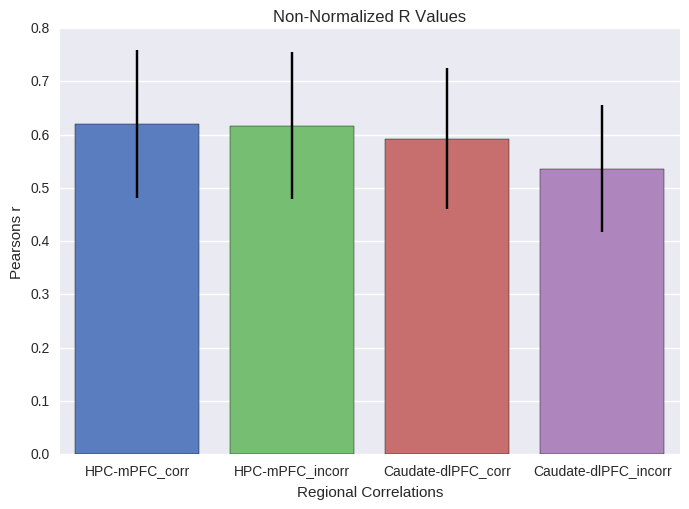

In [5]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt

N = 4
conditions = ['HPC-mPFC_corr', 'HPC-mPFC_incorr', 'Caudate-dlPFC_corr', 'Caudate-dlPFC_incorr']
means_allsubjs = [np.average(corr_chart['HPC-mPFC_corr']), 
                  np.average(corr_chart['HPC-mPFC_incorr']),
                  np.average(corr_chart['Caudate-dlPFC_corr']), 
                  np.average(corr_chart['Caudate-dlPFC_incorr'])]
sem_allsubjs = [np.average(corr_chart['HPC-mPFC_corr']/(np.sqrt(len(sids)))), 
                np.average(corr_chart['HPC-mPFC_incorr']/(np.sqrt(len(sids)))),
                np.average(corr_chart['Caudate-dlPFC_corr']/(np.sqrt(len(sids)))), 
                np.average(corr_chart['Caudate-dlPFC_incorr']/(np.sqrt(len(sids))))]
print np.average(corr_chart['HPC-mPFC_corr'])
print np.average(corr_chart['HPC-mPFC_incorr'])
print np.average(corr_chart['Caudate-dlPFC_corr'])
print np.average(corr_chart['Caudate-dlPFC_incorr'])


ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black')

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
#ax.set_ylim(0,1)
ax.set_ylabel("Pearsons r")
ax.set_xlabel("Regional Correlations")
ax.set_title("Non-Normalized R Values")
plt.show()

## Normalized correlation matrix for beta series

In [6]:
# Use Numpy's arctangent function to normalize correlations
norm_corr = np.arctanh(corr_matrix[:, 1:])
#print(norm_corr)

In [7]:
import pandas as pd
norm_chart = {}
norm_chart['HPC-mPFC_corr'] = norm_corr[:, 0] #hpc-mpfc corr
norm_chart['HPC-mPFC_incorr'] = norm_corr[:, 1] #hpc-mpfc incorr
norm_chart['Caudate-dlPFC_corr'] = norm_corr[:, 2] #caudate-dlpfc corr
norm_chart['Caudate-dlPFC_incorr'] = norm_corr[:, 3] #caudate-dlpfc incorr
norm_chart_df = pd.DataFrame.from_dict(norm_chart)

In [8]:
norm_chart_df

,Caudate-dlPFC_corr,Caudate-dlPFC_incorr,HPC-mPFC_corr,HPC-mPFC_incorr
0,0.507442,0.246997,0.686957,0.489186
1,0.977477,0.763707,0.998963,0.660101
2,1.022367,0.837772,0.960574,0.859715
3,0.821643,0.861967,0.972319,1.252457
4,0.224664,0.360093,0.882281,1.152918
5,0.842012,0.846867,0.812768,0.814556
6,1.277934,1.304123,1.062178,1.078929
7,0.354264,0.156646,0.429195,0.441556
8,0.580823,0.641682,0.580672,0.620492
9,0.529085,0.405235,0.674967,0.781034


### Descriptive Statistics

In [9]:
print "Mean: HPC-mPFC_corr"
print np.average(norm_corr[:, 0])
print "SD: HPC-mPFC_corr"
print np.std(norm_corr[:, 0])
print ""
print "Mean: HPC-mPFC_incorr"
print np.average(norm_corr[:, 1])
print "SD: HPC-mPFC_incorr"
print np.std(norm_corr[:, 1])
print ""
print "Mean: Caudate-dlPFC_corr"
print np.average(norm_corr[:, 2])
print "SD: Caudate-dlPFC_corr"
print np.std(norm_corr[:, 2])
print ""
print "Mean: Caudate-dlPFC_incorr"
print np.average(norm_corr[:, 3])
print "SD: Caudate-dlPFC_incorr"
print np.std(norm_corr[:, 3])

Mean: HPC-mPFC_corr
0.767054308387
SD: HPC-mPFC_corr
0.270332398278

Mean: HPC-mPFC_incorr
0.784388724039
SD: HPC-mPFC_incorr
0.33748863731

Mean: Caudate-dlPFC_corr
0.732589580146
SD: Caudate-dlPFC_corr
0.302585502282

Mean: Caudate-dlPFC_incorr
0.656390377487
SD: Caudate-dlPFC_incorr
0.33370640204


### Inferential Statistics

In [10]:
print 'T-test: HPC-mPFC_corr vs. HPC-mPFC_incorr'
print stats.ttest_rel(norm_corr[:, 0], norm_corr[:, 1])
print ""

print 'T-test: Caudate-dlPFC_corr vs. Caudate-dlPFC_incorr'
print stats.ttest_rel(norm_corr[:, 2], norm_corr[:, 3])
print ""

print "Bonferroni correction"
print '0.05/2 = 0.025'

T-test: HPC-mPFC_corr vs. HPC-mPFC_incorr
Ttest_relResult(statistic=-0.47724925883738023, pvalue=0.63862836544355539)

T-test: Caudate-dlPFC_corr vs. Caudate-dlPFC_incorr
Ttest_relResult(statistic=2.4136439967827821, pvalue=0.026054366348540088)

Bonferroni correction
0.05/2 = 0.025


## Scatterplots illustrating regional activation across trials: Single subject

### Hippocampus vs. mPFC: Fixed before CORRECT

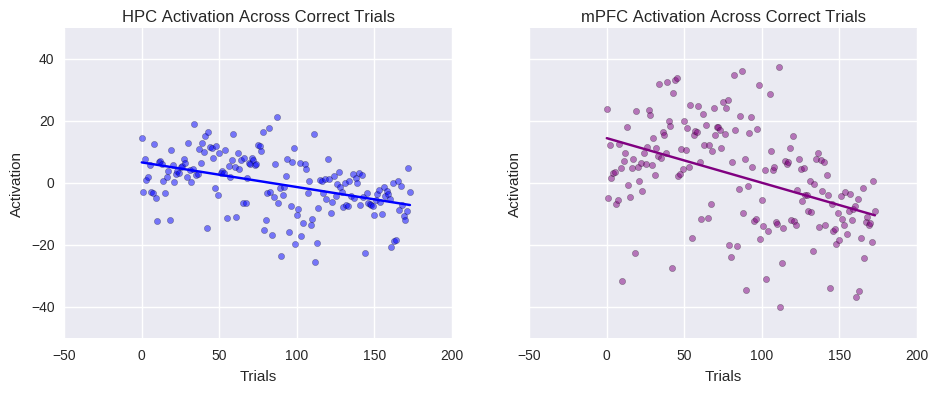

In [11]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,174,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['hp_corr']
z = all_data['mPFC_corr']
#print len(y)
#print len(z)


fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = True, sharey = True)
fit = np.polyfit(x, y, deg = 1)
ax.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('Activation')
ax.set_xlabel('Trials')
ax.set_title('HPC Activation Across Correct Trials')


fit2 = np.polyfit(x, z, deg = 1)
ax2.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
ax2.scatter(x, z, c = 'purple', alpha = 0.5)
ax2.set_ylabel('Activation')
ax2.set_xlabel('Trials')
ax2.set_title('mPFC Activation Across Correct Trials')

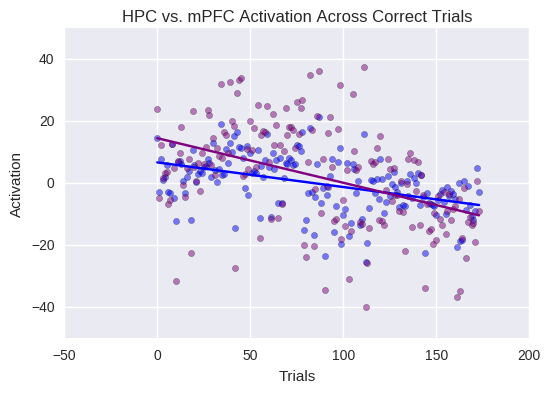

In [12]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,174,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['hp_corr']
z = all_data['mPFC_corr']
#print len(y)
#print len(z)

fit = np.polyfit(x, y, deg = 1)
plt.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
plt.scatter(x, y, c = 'blue', alpha = 0.5)

fit2 = np.polyfit(x, z, deg = 1)
plt.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
plt.scatter(x, z, c = 'purple', alpha = 0.5)

plt.ylabel('Activation')
plt.xlabel('Trials')
plt.title('HPC vs. mPFC Activation Across Correct Trials')
plt.show()

### Hippocampus vs. mPFC: Fixed before INCORRECT

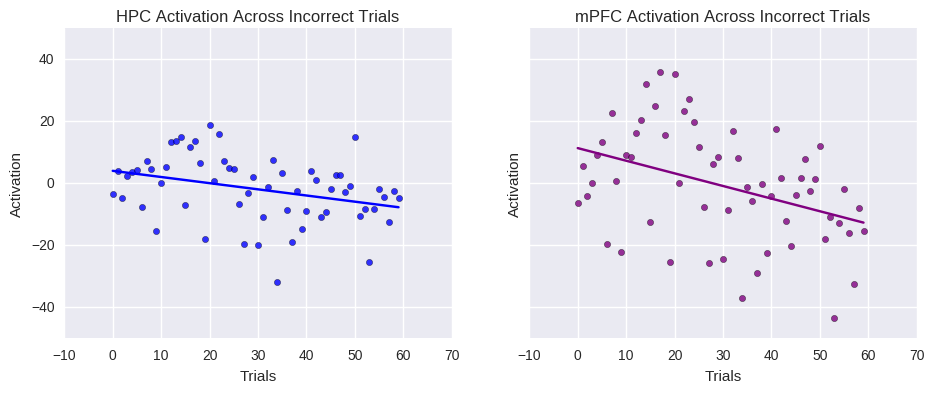

In [13]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,60,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['hp_incorr']
z = all_data['mPFC_incorr']
#print len(y)
#print len(z)

fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = True, sharey = True)
fit = np.polyfit(x, y, deg = 1)
ax.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.8)
ax.set_ylabel('Activation')
ax.set_xlabel('Trials')
ax.set_title('HPC Activation Across Incorrect Trials')


fit2 = np.polyfit(x, z, deg = 1)
ax2.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
ax2.scatter(x, z, c = 'purple', alpha = 0.8)
ax2.set_ylabel('Activation')
ax2.set_xlabel('Trials')
ax2.set_title('mPFC Activation Across Incorrect Trials')

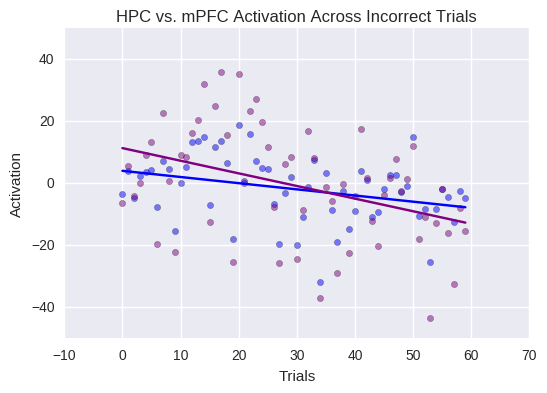

In [14]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,60,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['hp_incorr']
z = all_data['mPFC_incorr']
#print len(y)
#print len(z)

fit = np.polyfit(x, y, deg = 1)
plt.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
plt.scatter(x, y, c = 'blue', alpha = 0.5)

fit2 = np.polyfit(x, z, deg = 1)
plt.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
plt.scatter(x, z, c = 'purple', alpha = 0.5)

plt.ylabel('Activation')
plt.xlabel('Trials')
plt.title('HPC vs. mPFC Activation Across Incorrect Trials')
plt.show()

### Caudate vs. dlPFC: Fixed before CORRECT

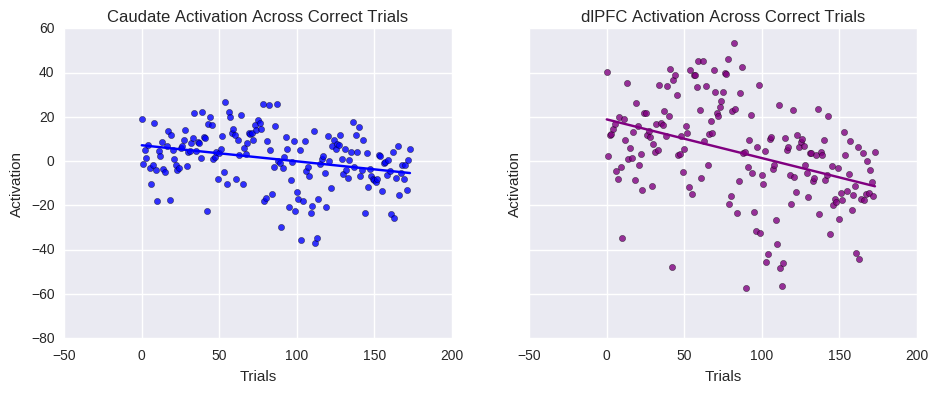

In [15]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,174,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['caudate_corr']
z = all_data['dlPFC_corr']
#print len(y)
#print len(z)

fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = True, sharey = True)
fit = np.polyfit(x, y, deg = 1)
ax.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.8)
ax.set_ylabel('Activation')
ax.set_xlabel('Trials')
ax.set_title('Caudate Activation Across Correct Trials')


fit2 = np.polyfit(x, z, deg = 1)
ax2.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
ax2.scatter(x, z, c = 'purple', alpha = 0.8)
ax2.set_ylabel('Activation')
ax2.set_xlabel('Trials')
ax2.set_title('dlPFC Activation Across Correct Trials')

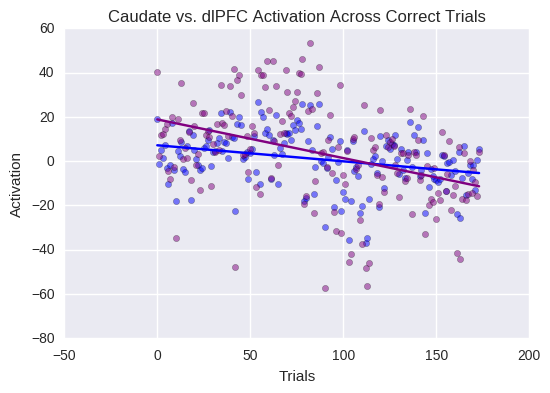

In [16]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,174,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['caudate_corr']
z = all_data['dlPFC_corr']
#print len(y)
#print len(z)

fit = np.polyfit(x, y, deg = 1)
plt.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
plt.scatter(x, y, c = 'blue', alpha = 0.5)

fit2 = np.polyfit(x, z, deg = 1)
plt.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
plt.scatter(x, z, c = 'purple', alpha = 0.5)

plt.ylabel('Activation')
plt.xlabel('Trials')
plt.title('Caudate vs. dlPFC Activation Across Correct Trials')
plt.show()

### Caudate vs. dlPFC: Fixed before INCORRECT

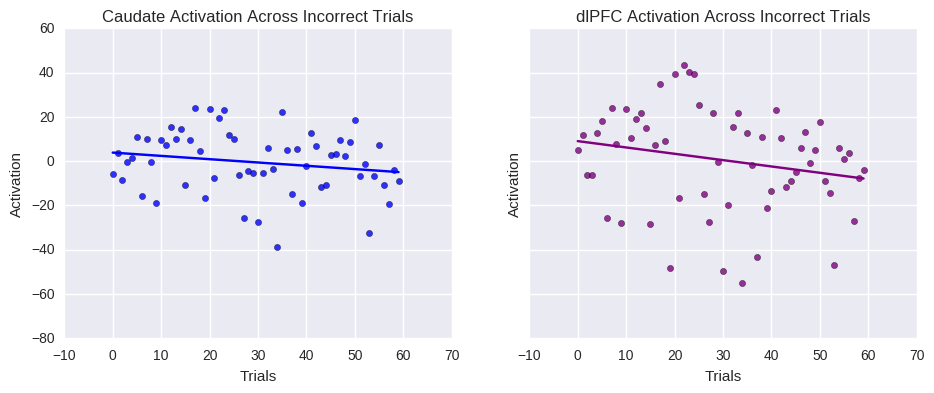

In [17]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,60,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['caudate_incorr']
z = all_data['dlPFC_incorr']
#print len(y)
#print len(z)

fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = True, sharey = True)
fit = np.polyfit(x, y, deg = 1)
ax.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.8)
ax.set_ylabel('Activation')
ax.set_xlabel('Trials')
ax.set_title('Caudate Activation Across Incorrect Trials')

fit2 = np.polyfit(x, z, deg = 1)
ax2.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
ax2.scatter(x, z, c = 'purple', alpha = 0.8)
ax2.set_ylabel('Activation')
ax2.set_xlabel('Trials')
ax2.set_title('dlPFC Activation Across Incorrect Trials')

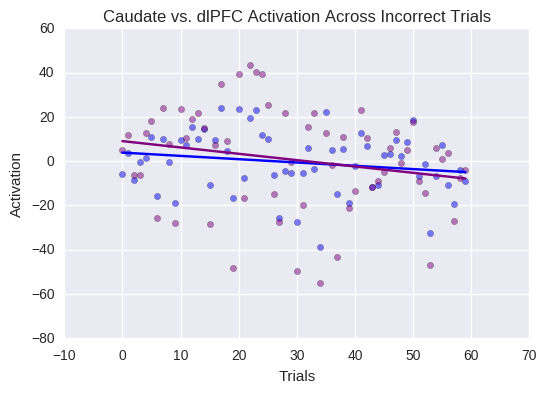

In [18]:
%matplotlib inline
# Scatterplot

ax = []
for a in range(0,60,1):
    ax.append(a)

x = ax

#print len(x)
y = all_data['caudate_incorr']
z = all_data['dlPFC_incorr']
#print len(y)
#print len(z)

fit = np.polyfit(x, y, deg = 1)
plt.plot(x, np.array(fit[0]) * np.array(x) + np.array(fit[1]), color = 'blue')
plt.scatter(x, y, c = 'blue', alpha = 0.5)

fit2 = np.polyfit(x, z, deg = 1)
plt.plot(x, np.array(fit2[0]) * np.array(x) + np.array(fit2[1]), color = 'purple')
plt.scatter(x, z, c = 'purple', alpha = 0.5)

plt.ylabel('Activation')
plt.xlabel('Trials')
plt.title('Caudate vs. dlPFC Activation Across Incorrect Trials')
plt.show()